In [234]:
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob
from datetime import datetime
from IPython.display import display
import pmdarima as pm
from statsmodels.tsa.seasonal import seasonal_decompose
%matplotlib inline 

In [235]:
arquivos = glob("C:/Users/ppgar/OneDrive/Documentos/Dados/Treino/*.csv")
df = pd.DataFrame([])
for arquivo in arquivos:
    dados = pd.read_csv(arquivo, sep = ";")
    df = pd.concat([df, dados])
treino = df

In [236]:

treino['din_instante'] = pd.to_datetime(treino['din_instante'])
treino['din_instante'] = treino['din_instante'].dt.strftime('%Y-%m')
treino = treino.rename(columns = {'din_instante': 'data'})
display(treino.head())

,data,id_subsistema,nom_subsistema,id_estado,nom_estado,cod_modalidadeoperacao,nom_tipousina,nom_tipocombustivel,nom_usina,ceg,val_geracao,id_ons
0,2000-01,N,NORTE,PA,PARA,TIPO I,HIDROELÉTRICA,Hidráulica,Tucuruí,UHE.PH.PA.002889-4.01,2422.5,NaN
1,2000-01,NE,NORDESTE,AL,ALAGOAS,TIPO I,HIDROELÉTRICA,Hidráulica,Xingó,UHE.PH.SE.027053-9.01,1995.6,NaN
2,2000-01,NE,NORDESTE,BA,BAHIA,Pequenas Usinas (Tipo III),HIDROELÉTRICA,Hidráulica,Pequenas Centrais Hidroelétricas da Chesf,-,13.0,NaN
3,2000-01,NE,NORDESTE,BA,BAHIA,TIPO I,HIDROELÉTRICA,Hidráulica,Apolônio Sales,UHE.PH.AL.001510-5.01,202.5,NaN
4,2000-01,NE,NORDESTE,BA,BAHIA,TIPO I,HIDROELÉTRICA,Hidráulica,Paulo Afonso II,UHE.PH.BA.027048-2.01,269.8,NaN


In [237]:
treino = treino.drop(['nom_subsistema', 'nom_estado', 'ceg', 'id_ons', 'nom_tipousina', 'nom_usina', 'id_estado', 'cod_modalidadeoperacao'], axis = 1)



In [239]:
norte = treino[treino['id_subsistema'] == "N"]
nordeste = treino[treino['id_subsistema'] == "NE"]
sul = treino[treino['id_subsistema'] == "S"]
sudeste = treino[treino['id_subsistema'] == "SE"]

norte['data'] = norte['data'].str.replace('-', '').astype(int)

C:\Users\ppgar\AppData\Local\Temp\ipykernel_1948\438889859.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  norte['data'] = norte['data'].str.replace('-', '').astype(int)


In [ ]:
display(treino)

,data,id_subsistema,nom_tipocombustivel,val_geracao
0,2000-01,N,Hidráulica,2422.500
1,2000-01,NE,Hidráulica,1995.600
2,2000-01,NE,Hidráulica,13.000
3,2000-01,NE,Hidráulica,202.500
4,2000-01,NE,Hidráulica,269.800
...,...,...,...,...
4288651,2018-12,SE,Biomassa,21.000
4288652,2018-12,SE,Biomassa,13.000
4288653,2018-12,SE,Hidráulica,119.600
4288654,2018-12,SE,Hidráulica,476.403


In [240]:
norte = norte.groupby('data').sum('val_geracao')
sul = sul.groupby('data').sum('val_geracao')
sudeste = sudeste.groupby('data').sum('val_geracao')
nordeste = nordeste.groupby('data').sum('val_geracao')


In [241]:
display(norte)

,val_geracao
data,
200001,2459950.900
200002,2196414.200
200003,2261361.100
200004,2264178.200
200005,2430484.600
...,...
201808,5573038.178
201809,5048504.188
201810,4826781.938


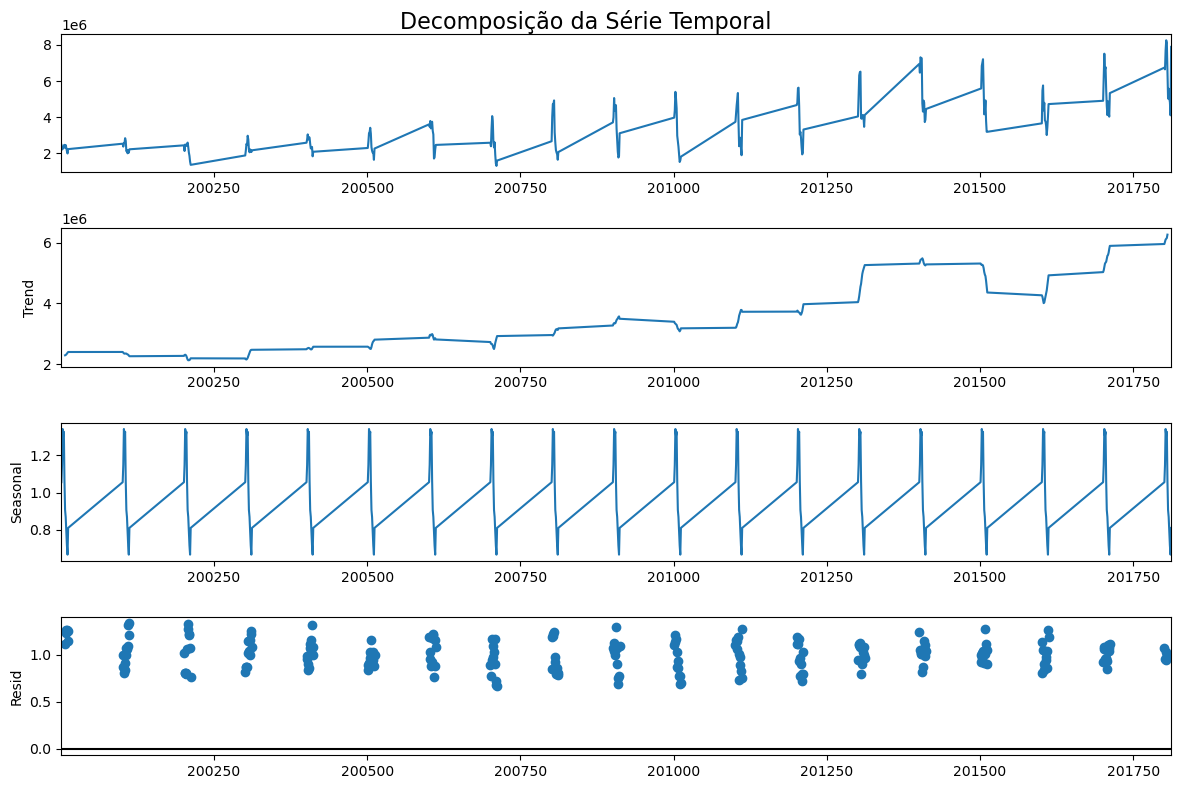

In [242]:
decomposition = seasonal_decompose(norte, model='multiplicative', period=12)  # decomposição anual
fig = decomposition.plot()
fig.set_size_inches(12, 8)
fig.add_gridspec()
fig.suptitle('Decomposição da Série Temporal', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.tick_params(labelsize=10)
plt.show()

In [ ]:
arquivos = glob("C:/Users/ppgar/OneDrive/Documentos/Dados/Validacao/*.csv")
df = pd.DataFrame([])
for arquivo in arquivos:
    dados = pd.read_csv(arquivo, sep = ";")
    df = pd.concat([df, dados])
validacao = df


In [ ]:
validacao['din_instante'] = pd.to_datetime(validacao['din_instante'])
validacao['din_instante'] = validacao['din_instante'].dt.strftime('%Y-%m')
validacao = validacao.rename(columns = {'din_instante': 'data'})


,data,id_subsistema,nom_subsistema,id_estado,nom_estado,cod_modalidadeoperacao,nom_tipousina,nom_tipocombustivel,nom_usina,ceg,val_geracao,id_ons
0,2019-01,N,NORTE,AM,AMAZONAS,TIPO I,HIDROELÉTRICA,Hidráulica,Balbina,UHE.PH.AM.000190-2.01,82.993,NaN
1,2019-01,N,NORTE,AM,AMAZONAS,TIPO III,TÉRMICA,Óleo Diesel,Flores 4,UTE.PE.AM.029192-7.01,14.032,NaN
2,2019-01,N,NORTE,AM,AMAZONAS,TIPO I,TÉRMICA,Gás,Ponta Negra,UTE.GN.AM.029361-0.02,65.343,NaN
3,2019-01,N,NORTE,AM,AMAZONAS,TIPO I,TÉRMICA,Gás,Tambaqui,UTE.PE.AM.029276-1.01,50.980,NaN
4,2019-01,N,NORTE,AM,AMAZONAS,TIPO III,TÉRMICA,Óleo Combustível,Distrito A,UTE.PE.AM.030273-2.01,0.000,NaN


In [ ]:
Vnorte = validacao[validacao['id_subsistema'] == "N"]
Vnordeste = validacao[validacao['id_subsistema'] == "NE"]
Vsul = validacao[validacao['id_subsistema'] == "S"]
Vsudeste = validacao[validacao['id_subsistema'] == "SE"]
Vnorte = Vnorte.groupby('data').sum('val_geracao')
Vsul = Vsul.groupby('data').sum('val_geracao')
Vsudeste = Vsudeste.groupby('data').sum('val_geracao')
Vnordeste = Vnordeste.groupby('data').sum('val_geracao')

In [ ]:
Vnorte['Data'] = (Vnorte.index)
display(Vnorte)

,val_geracao,Data
data,,
2019-01,8.487387e+06,201901
2019-02,8.908365e+06,201902
2019-03,9.475071e+06,201903
2019-04,8.963661e+06,201904
2019-05,9.037046e+06,201905
2019-06,6.650196e+06,201906
2019-07,5.179064e+06,201907
2019-08,4.540511e+06,201908
2019-09,5.018144e+06,201909


In [ ]:
model = pm.auto_arima(norte, seasonal=True, m=12)
forecasts = model.predict(Vnorte.index)

plt.figure(figsize=(12, 7))
plt.plot(norte, label = "Histórico", color = 'blue')
plt.plot(Vnorte, label="Teste", color='green')
plt.plot(forecasts, label="Previsão ARIMA", linestyle="--", color='red')
plt.legend(loc='upper left')
plt.show()

TypeError: n_periods must be an int